### Imports

In [1]:
#modules 

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix



### Loading the Data Set & Pre-Processing 

In [2]:

# Load dataset

csv_file_path = r'C:\Users\14165\Downloads\hepatitis\hepatitis.csv'
df = pd.read_csv(r'C:\Users\14165\Downloads\hepatitis\hepatitis.csv')

### Data Preprocessing

## Identifying missing values 

df = df.apply(pd.to_numeric, errors='coerce') # Coverting to numeric

df.replace("?", np.nan, inplace=True) # Replacing the "?" in the dataset with "NA"
print(df.isna().sum()) # Summary of NA values across columns






SURV                0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER BIG          10
LIVER FIRM         11
SPLEEN PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
dtype: int64


In [3]:
# Removing Protime

df = df.drop("PROTIME", axis=1, errors="ignore")

# Imputing values for the remaining columns, separated by variable type

continous_cols = ['BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN']
dummy_cols = ['SURV', 'SEX','STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES']

continous_imputer = SimpleImputer(strategy='median')
dummy_imputer = SimpleImputer(strategy='most_frequent')

df[continous_cols] = pd.DataFrame(continous_imputer.fit_transform(df[continous_cols]))  # Imputing continuous variables
df[dummy_cols] = pd.DataFrame(dummy_imputer.fit_transform(df[dummy_cols]))  # Imputing dummy variables

print(df.isna().sum()) # Summary of NA values across columns

df

SURV               0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
HISTOLOGY          0
dtype: int64


,SURV,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY
0,2.0,30,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,1
1,2.0,50,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,1
2,2.0,78,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,1
3,2.0,31,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,1
4,2.0,34,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,200.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1.0,46,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,85.0,242.0,3.3,2
151,2.0,44,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,2
152,2.0,61,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,2
153,2.0,53,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,2


In [4]:
# Remapping dummy values
df[dummy_cols] = df[dummy_cols].replace({1: 0, 2: 1})

df 

,SURV,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY
0,1.0,30,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,18.0,4.0,1
1,1.0,50,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.0,42.0,3.5,1
2,1.0,78,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.0,32.0,4.0,1
3,1.0,31,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.0,52.0,4.0,1
4,1.0,34,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,200.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.0,46,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.6,85.0,242.0,3.3,2
151,1.0,44,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,126.0,142.0,4.3,2
152,1.0,61,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.8,75.0,20.0,4.1,2
153,1.0,53,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,81.0,19.0,4.1,2


### Exploratory Data Analysis

             SURV         AGE         SEX     STEROID  ANTIVIRALS     FATIGUE  \
count  155.000000  155.000000  155.000000  155.000000  155.000000  155.000000   
mean     0.793548   41.200000    0.103226    0.509677    0.845161    0.348387   
std      0.406070   12.565878    0.305240    0.501527    0.362923    0.478004   
min      0.000000    7.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   32.000000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000   39.000000    0.000000    1.000000    1.000000    0.000000   
75%      1.000000   50.000000    0.000000    1.000000    1.000000    1.000000   
max      1.000000   78.000000    1.000000    1.000000    1.000000    1.000000   

          MALAISE    ANOREXIA   LIVER BIG  LIVER FIRM  SPLEEN PALPABLE  \
count  155.000000  155.000000  155.000000  155.000000       155.000000   
mean     0.606452    0.793548    0.838710    0.612903         0.806452   
std      0.490120    0.406070    0.368991    0.4

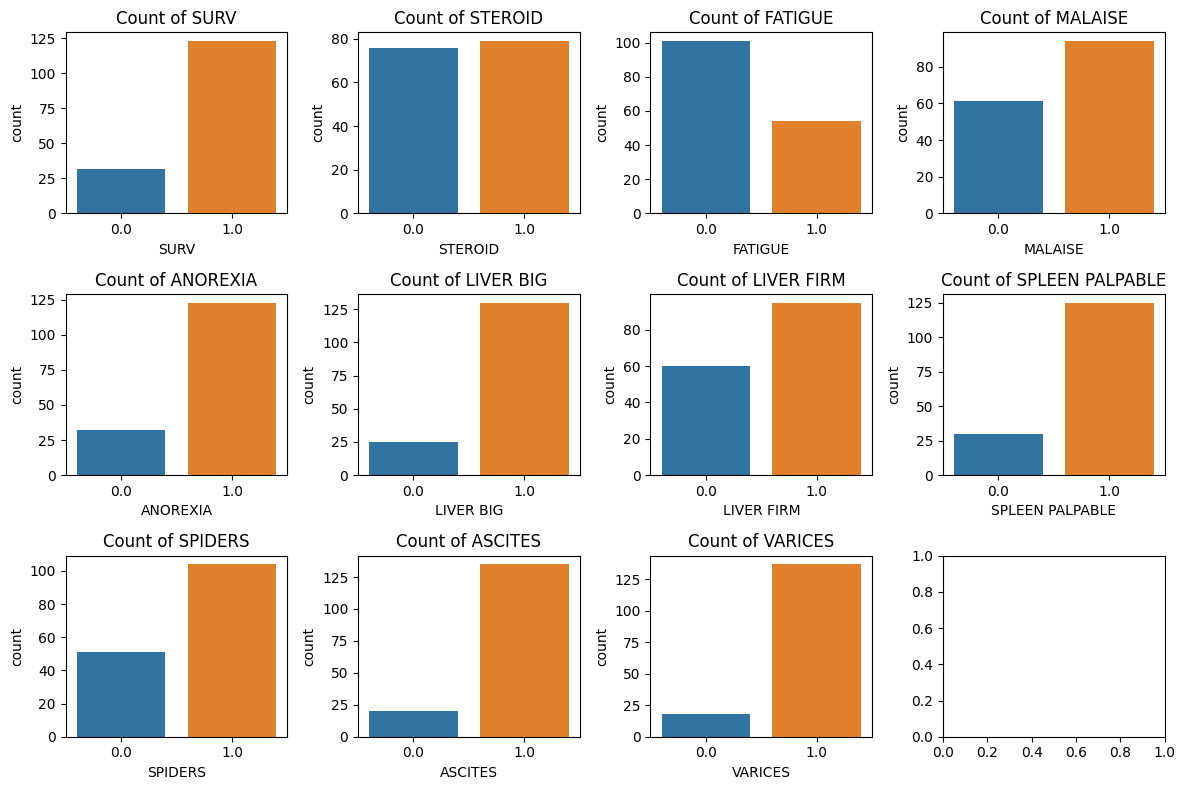

,SURV,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY
0,1.0,30,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,18.0,4.0,1
1,1.0,50,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.0,42.0,3.5,1
2,1.0,78,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.0,32.0,4.0,1
3,1.0,31,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.0,52.0,4.0,1
4,1.0,34,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,200.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.0,46,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.6,85.0,242.0,3.3,2
151,1.0,44,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,126.0,142.0,4.3,2
152,1.0,61,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.8,75.0,20.0,4.1,2
153,1.0,53,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,81.0,19.0,4.1,2


In [5]:
# Exploratory Data Analysis 

summary_stats = df.describe() # Summary Statistics
print(summary_stats)

dummy_vars = ['SURV', 'STEROID', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES']

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))
axes = axes.flatten()

for i, variable in enumerate(dummy_vars):
    sns.countplot(x=variable, data=df, ax=axes[i])
    axes[i].set_title(f'Count of {variable}')


plt.tight_layout()
plt.show() # Visualzing Distribution of Categorical Variables



df

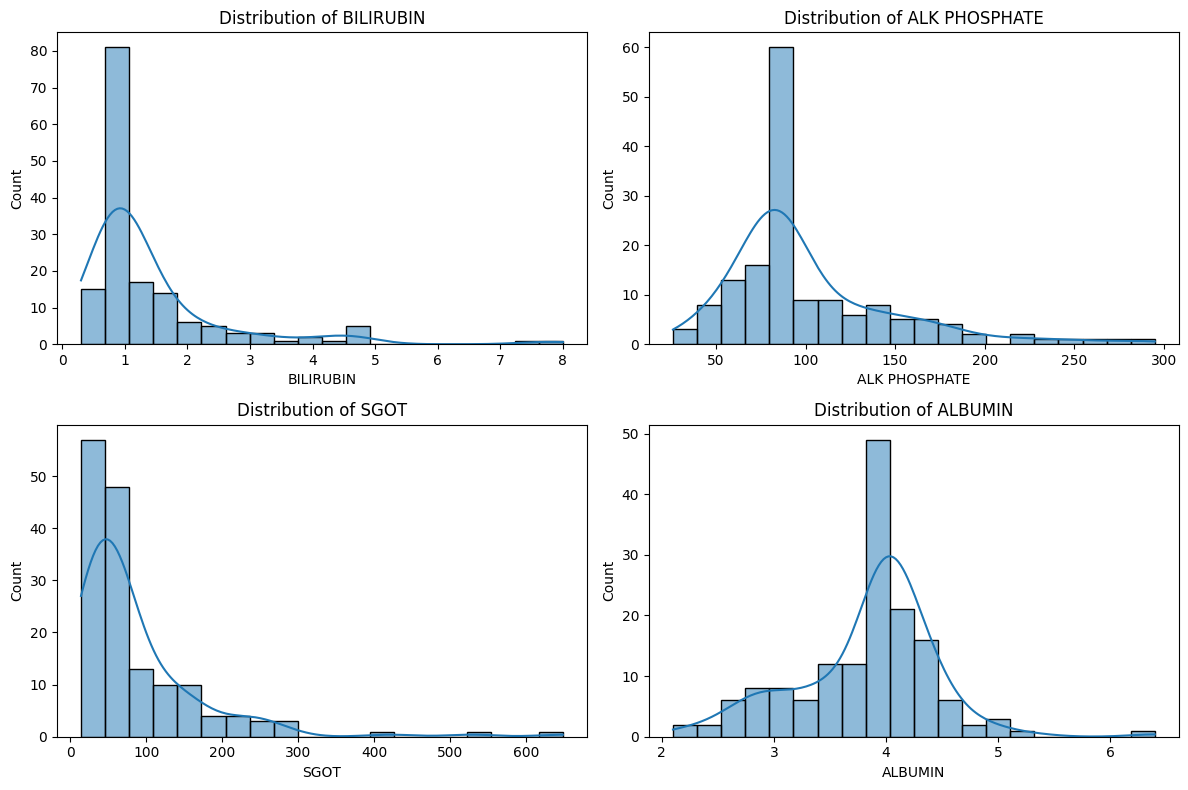

In [6]:
continous_vars = ['BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, variable in enumerate(continous_vars):
    sns.histplot(df[variable], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {variable}')

plt.tight_layout()
plt.show() # Visualizing distirbution across continuous variables 



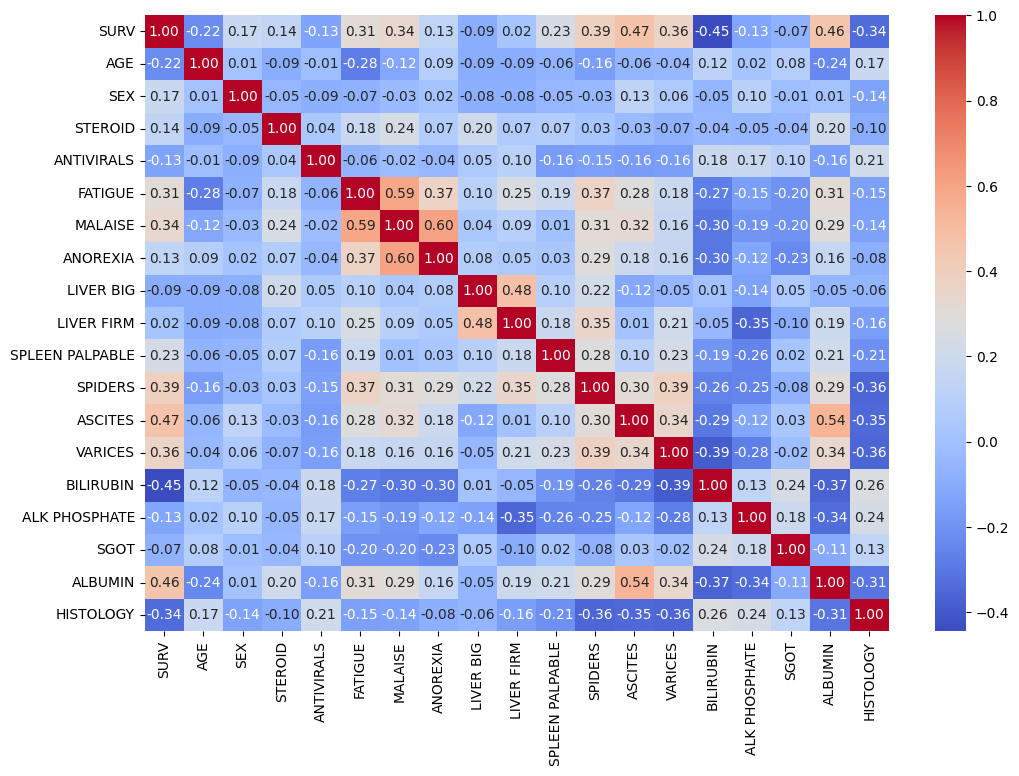

In [7]:
# Correlation Matrix

corr_matrix = df.corr()

plt.figure(figsize = (12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### Feature Scaling and Model Selection

In [8]:
# Feature Scaling of continous variables


scaler = StandardScaler()

df[continous_cols] = scaler.fit_transform(df[continous_cols])


df


,SURV,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY
0,1.0,30,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,-0.346128,-0.352069,-0.760716,0.265479,1
1,1.0,50,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,-0.430351,0.713349,-0.488927,-0.544545,1
2,1.0,78,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.598796,-0.117677,-0.602173,0.265479,1
3,1.0,31,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.598796,-1.183096,-0.375682,0.265479,1
4,1.0,34,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.346128,-0.352069,1.300348,0.265479,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.0,46,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5.212566,-0.352069,1.775979,-0.868554,2
151,1.0,44,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,-0.430351,0.521574,0.643526,0.751493,2
152,1.0,61,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,-0.514573,-0.565153,-0.738067,0.427483,2
153,1.0,53,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.074985,-0.437303,-0.749392,0.427483,2


In [9]:
# Stratified Train/Test Split


X = df.drop('SURV', axis=1).values # Features 
y = df['SURV'].values # Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)



In [10]:
## Model Selection (Non-PCA)

# Define a list of classifiers
classifiers = [
    RandomForestClassifier(),
    SVC(),
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(),
    GaussianNB()
]

# Loop through each classifier and print the cross-validation scores
for clf in classifiers:
    with warnings.catch_warnings():
         warnings.simplefilter("ignore", category=UserWarning)
         scores = cross_val_score(clf, X_train, y_train, cv=10)
        
    print(f'{clf.__class__.__name__}: {scores.mean()}')

RandomForestClassifier: 0.823076923076923
SVC: 0.7910256410256411
LogisticRegression: 0.8320512820512821
KNeighborsClassifier: 0.825
GaussianNB: 0.7269230769230769


  File "c:\Users\14165\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\14165\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\14165\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1024, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\14165\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1509, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


### Learning Curves (Random Forest & Logistic Regression, Non-PCA)

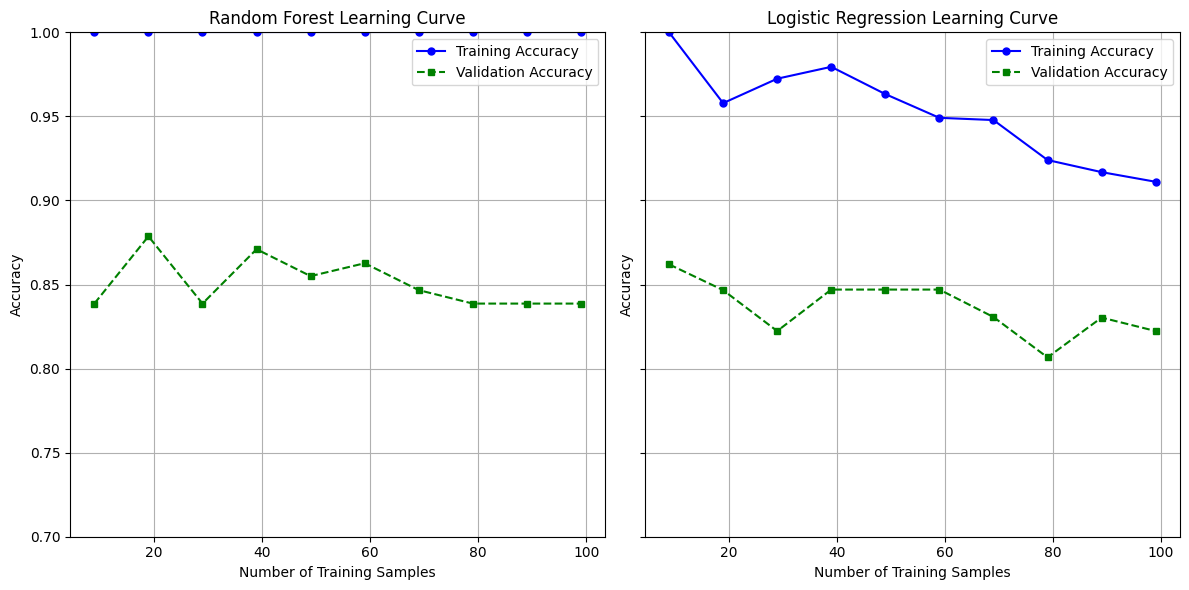

In [11]:
#Learning Curves for top two classifiers (Random Forest & Logistic Regression)


rfc = RandomForestClassifier()
lr = LogisticRegression(max_iter=1000)

def plot_learning_curve(ax, train_sizes, train_mean, test_mean, title):
    ax.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
    ax.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
    ax.set_xlabel('Number of Training Samples')
    ax.set_ylabel('Accuracy')
    ax.set_title(title + ' Learning Curve')
    ax.legend(loc='upper right')
    ax.grid(True)



# Random Forest Learning Curve
train_sizes_rfc, train_scores_rfc, test_scores_rfc = learning_curve(
    rfc, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_mean_rfc = np.mean(train_scores_rfc, axis=1)
test_mean_rfc = np.mean(test_scores_rfc, axis=1)

# LR Learning Curve --> surpressed convergence warning 
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    train_sizes_lr, train_scores_lr, test_scores_lr = learning_curve(
    lr, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_mean_lr = np.mean(train_scores_lr, axis=1)
test_mean_lr = np.mean(test_scores_lr, axis=1)

# Set a common y-axis limit for both subplots
y_limit = (0.7, 1)

# Plotting the subplots with a shared y-axis and common y-axis limits
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Subplot 1 for GaussianNB
plot_learning_curve(axs[0], train_sizes_rfc, train_mean_rfc, test_mean_rfc, 'Random Forest')
axs[0].set_ylim(y_limit)

# Subplot 2 for Logistic Regression
plot_learning_curve(axs[1], train_sizes_lr, train_mean_lr, test_mean_lr, 'Logistic Regression')
axs[1].set_ylim(y_limit)

plt.tight_layout()
plt.show()

### Model Tuning and Evaluation (Non-PCA)

In [12]:
# RFC Tuning

param_grid_rfc = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rfc = GridSearchCV(RandomForestClassifier(), param_grid_rfc, cv=10, scoring='accuracy')
grid_search_rfc.fit(X_train, y_train)

print("RF Best Parameters: ", grid_search_rfc.best_params_)

# LR Tuning

param_grid_lr = {
    'penalty': ['l2'],
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=10, scoring='accuracy')

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    grid_search_lr.fit(X_train, y_train)

print("LR Best Parameters:", grid_search_lr.best_params_)


RF Best Parameters:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
LR Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [13]:
# Evaluating Random Forest

tuned_model_rfc = grid_search_rfc.best_estimator_
test_accuracy = tuned_model_rfc.score(X_test, y_test)
print("RFC Test Accuracy: %0.2f" % test_accuracy)


# Evaluating LR

tuned_model_lr = grid_search_lr.best_estimator_
test_accuracy_lr = tuned_model_lr.score(X_test, y_test)
print("LR Test Accuracy: %0.2f" % test_accuracy_lr)



RFC Test Accuracy: 0.84
LR Test Accuracy: 0.84


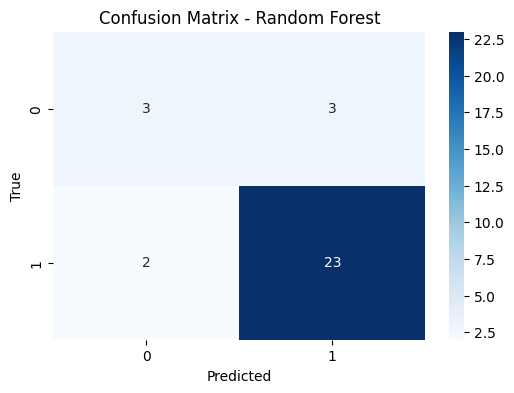

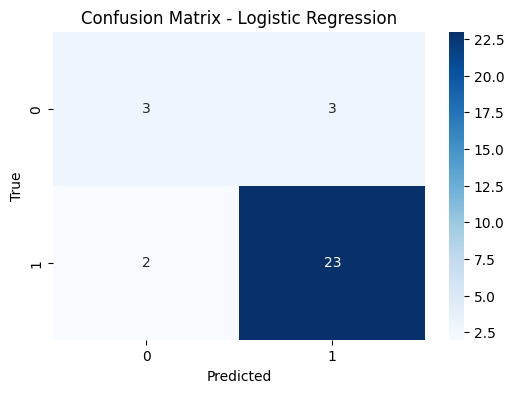

In [14]:


# Tuned RFC
rfc_confusion_matrix = confusion_matrix(y_test, tuned_model_rfc.predict(X_test))

# Plot RFC Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(rfc_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Tuned LR
lr_confusion_matrix = confusion_matrix(y_test, tuned_model_lr.predict(X_test))

# Plot LR Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(lr_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()



### Addressing Overfitting and high-dimensionality with Principal Component Analysis 


Eigenvalues 
[1.68904875e+02 1.95142620e+00 1.01775247e+00 9.40452590e-01
 5.90503228e-01 4.34158567e-01 2.78682040e-01 2.57402929e-01
 2.42074141e-01 1.41704919e-01 1.17774655e-01 1.04138287e-01
 9.76976921e-02 4.22111220e-02 7.82099462e-02 7.52041657e-02
 5.62623472e-02 5.71658953e-02]


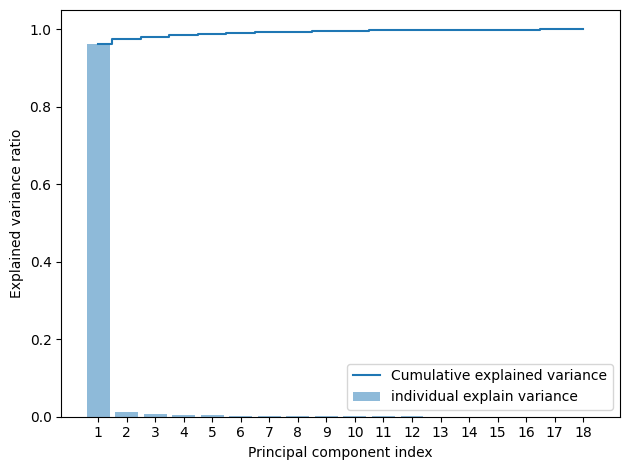

In [15]:
# Principal Component Analysis (for train and test sets)

import numpy as np
import matplotlib.pyplot as plt

cov_mat = np.cov(X_train.T)
cov_mat_test = np.cov(X_test.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
eigen_vals_test, eigen_vecs_test = np.linalg.eig(cov_mat_test)

print('\nEigenvalues \n%s' % eigen_vals) # Gives us the eigenvalues of the standardized feature covariance matrix

# Calculating variance explained ratios

tot = sum(eigen_vals)

var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

cum_var_exp = np.cumsum(var_exp)

# Graphing

num_components = len(var_exp)

plt.bar(range(1, num_components + 1), var_exp, alpha=0.5, align='center', label='individual explain variance')
plt.step(range(1, num_components + 1), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.xticks(range(1, num_components + 1))  # Set x-axis ticks to integers
plt.legend(loc='best')
plt.tight_layout()
plt.show() # We see that we capture almost 100% of the variation with the top 2 eigenvalues 



### PCA Model Selection

In [16]:
# PCA Transformation

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


## Model Selection

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Define a list of classifiers
classifiers = [
    RandomForestClassifier(),
    SVC(),
    LogisticRegression(),
    KNeighborsClassifier(),
    GaussianNB()
]

# Loop through each classifier and print the cross-validation scores
for clf in classifiers:
    scores = cross_val_score(clf, X_train_pca, y_train, cv=5)
    print(f'{clf.__class__.__name__}: {scores.mean()}')

RandomForestClassifier: 0.7743333333333333
SVC: 0.7903333333333333
LogisticRegression: 0.7906666666666667
KNeighborsClassifier: 0.799
GaussianNB: 0.8146666666666667


### PCA Learning Curves (Gaussian NB & Logistic Regression)

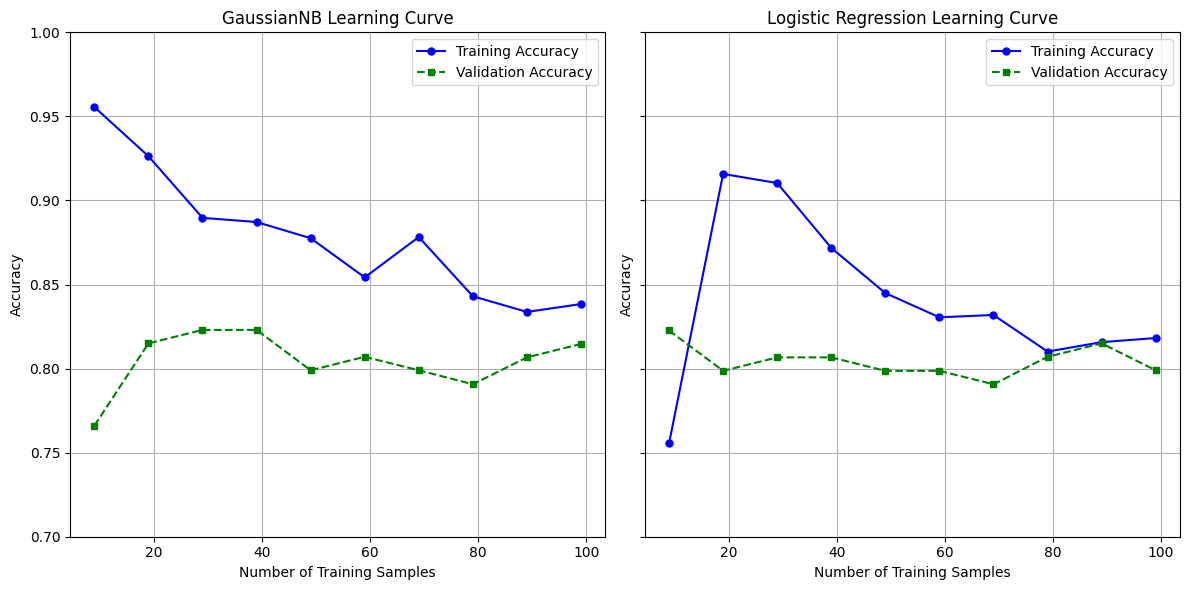

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

gnb = GaussianNB()
lr_pca = LogisticRegression()

def plot_learning_curve(ax, train_sizes, train_mean, test_mean, title):
    ax.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
    ax.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
    ax.set_xlabel('Number of Training Samples')
    ax.set_ylabel('Accuracy')
    ax.set_title(title + ' Learning Curve')
    ax.legend(loc='upper right')
    ax.grid(True)

# Assuming X_train_pca and y_train are your training data

# GaussianNB Learning Curve
train_sizes_gnb, train_scores_gnb, test_scores_gnb = learning_curve(
    gnb, X_train_pca, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_mean_gnb = np.mean(train_scores_gnb, axis=1)
test_mean_gnb = np.mean(test_scores_gnb, axis=1)

# LR Learning Curve
train_sizes_lr, train_scores_lr, test_scores_lr = learning_curve(
    lr_pca, X_train_pca, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_mean_lr = np.mean(train_scores_lr, axis=1)
test_mean_lr = np.mean(test_scores_lr, axis=1)

# Set a common y-axis limit for both subplots
y_limit = (0.7, 1)

# Plotting the subplots with a shared y-axis and common y-axis limits
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Subplot 1 for GaussianNB
plot_learning_curve(axs[0], train_sizes_gnb, train_mean_gnb, test_mean_gnb, 'GaussianNB')
axs[0].set_ylim(y_limit)

# Subplot 2 for Logistic Regression
plot_learning_curve(axs[1], train_sizes_lr, train_mean_lr, test_mean_lr, 'Logistic Regression')
axs[1].set_ylim(y_limit)

plt.tight_layout()
plt.show()

### Model Tuning and Evaluation (PCA) 

In [18]:
# Tuning GNB

param_grid_gnb = {'priors': [[0.1, 0.9], [0.2, 0.8], [0.3, 0.7]]}
grid_search_gnb = GridSearchCV(GaussianNB(), param_grid_gnb, cv=10, scoring='accuracy')
grid_search_gnb.fit(X_train_pca, y_train)

print("GNB Best Parameters: ", grid_search_gnb.best_params_)
print("GNB CV Accuracy: {:.2f}".format(grid_search_gnb.best_score_))

# Evaluating GNB

tuned_model_gnb = grid_search_gnb.best_estimator_
test_accuracy_gnb = tuned_model_gnb.score(X_test_pca, y_test)
print("GNB Test Accuracy: %0.2f" % test_accuracy)

# Tuning LR --> --> surpressed convergence warning 

param_grid_lr = {
    'penalty': ['l2'],
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'liblinear', 'sag', 'saga', 'lbfgs']
}

grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=10, scoring='accuracy')

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    grid_search_lr.fit(X_train_pca, y_train)

print("LR Best Parameters:", grid_search_lr.best_params_)
print("LR CV Accuracy: {:.2f}".format(grid_search_lr.best_score_))

# Evaluating LR

tuned_model_lrpca = grid_search_lr.best_estimator_

test_accuracy = tuned_model_lrpca.score(X_test_pca, y_test)
print("LR Test Accuracy: %0.2f" % test_accuracy)




GNB Best Parameters:  {'priors': [0.3, 0.7]}
GNB CV Accuracy: 0.84
GNB Test Accuracy: 0.84
LR Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
LR CV Accuracy: 0.82
LR Test Accuracy: 0.81


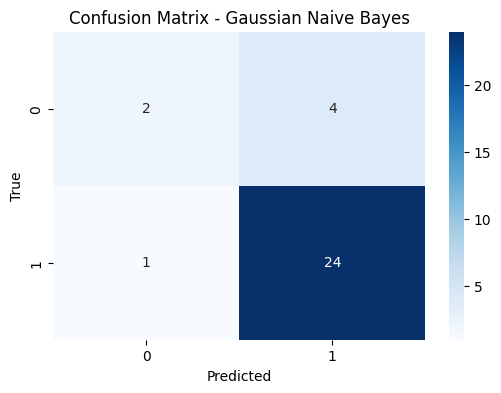

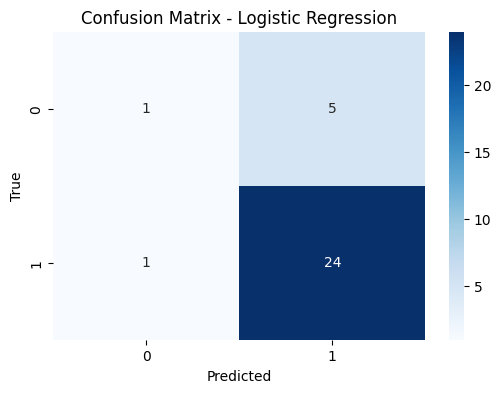

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Tuned GNB
gnb_confusion_matrix = confusion_matrix(y_test, tuned_model_gnb.predict(X_test_pca))

# Plot GNB Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(gnb_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.show()

# Tuned LR
lr_confusion_matrix = confusion_matrix(y_test, tuned_model_lrpca.predict(X_test_pca))

# Plot LR Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(lr_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
